<a href="https://colab.research.google.com/github/revian2119/KNN-classifier-for-text-with-cosine-distance/blob/main/VM_KNN_with_cosine_distance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Veri madenciliği dersi kapsamında, grup 8 tarafından yapılmıştır.

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
data = pd.read_excel("data2.xlsx")
data.head()

,Classes,Sentences
0,2,"Yok, sağ olasın."
1,2,"Yani, yaptığı bütün o korkunç şeylerden sonra ..."
2,1,At tam gözden kaybolmadan önce aniden dönerek ...
3,1,Patika da yoldan sağa doğru ayrılıp yaşlı bir ...
4,1,Sağa sola sallanıyordu.


In [139]:
data['Classes'].value_counts()

1    915
2    585
Name: Classes, dtype: int64

In [140]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [141]:
bow_transformer = CountVectorizer().fit(data['Sentences'])
bow_transformer.vocabulary_
title_bow = bow_transformer.transform(data['Sentences'])
print(title_bow)

  (0, 4410)	1
  (0, 5030)	1
  (0, 6383)	1
  (1, 900)	1
  (1, 1095)	1
  (1, 1118)	1
  (1, 1824)	1
  (1, 3653)	1
  (1, 4265)	1
  (1, 4506)	1
  (1, 5030)	1
  (1, 5263)	1
  (1, 5361)	1
  (1, 6108)	1
  (1, 6164)	1
  (1, 6631)	1
  (1, 7124)	1
  (2, 230)	1
  (2, 364)	1
  (2, 521)	1
  (2, 1644)	1
  (2, 2319)	1
  (2, 2502)	1
  (2, 3012)	1
  (2, 3402)	1
  :	:
  (1497, 5468)	1
  (1497, 6188)	1
  (1498, 196)	1
  (1498, 872)	1
  (1498, 1113)	1
  (1498, 1193)	1
  (1498, 3260)	1
  (1498, 4998)	1
  (1498, 5031)	1
  (1498, 5234)	1
  (1498, 5409)	1
  (1498, 5780)	1
  (1498, 6334)	1
  (1499, 687)	1
  (1499, 872)	1
  (1499, 995)	1
  (1499, 1222)	1
  (1499, 3065)	1
  (1499, 4460)	1
  (1499, 4991)	1
  (1499, 5030)	1
  (1499, 5400)	1
  (1499, 5893)	1
  (1499, 6580)	1
  (1499, 6845)	1


In [142]:
dataframe = pd.DataFrame(title_bow.toarray(),columns = bow_transformer.get_feature_names_out())

In [143]:
bow_transformer.vocabulary_

{'yok': 6383,
 'sağ': 5030,
 'olasın': 4410,
 'yani': 6108,
 'yaptığı': 6164,
 'bütün': 1095,
 'korkunç': 3653,
 'şeylerden': 7124,
 'sonra': 5263,
 'elflerle': 1824,
 'birlikte': 900,
 'onu': 4506,
 'bıraktığınızı': 1118,
 'mı': 4265,
 'söylemeye': 5361,
 'çalışıyorsun': 6631,
 'at': 364,
 'tam': 5517,
 'gözden': 2502,
 'kaybolmadan': 3402,
 'önce': 6935,
 'aniden': 230,
 'dönerek': 1644,
 'taraftaki': 5545,
 'ağaçların': 521,
 'içine': 3012,
 'girmişti': 2319,
 'patika': 4664,
 'da': 1222,
 'yoldan': 6401,
 'sağa': 5031,
 'doğru': 1539,
 'ayrılıp': 460,
 'yaşlı': 6293,
 'bir': 872,
 'meşe': 4173,
 'ormanından': 4539,
 'dolanarak': 1492,
 'ormansaray': 4536,
 'ulaşıyordu': 5823,
 'sola': 5234,
 'sallanıyordu': 4906,
 'çalıların': 6617,
 'ardında': 306,
 'gizleniyordu': 2350,
 'hemen': 2718,
 'karşıya': 3352,
 'geçip': 2239,
 'sağdan': 5035,
 'devam': 1379,
 'etmemiz': 1933,
 'gerekir': 2177,
 'giriş': 2308,
 'yanlarında': 6111,
 'beliriveren': 781,
 'yüksek': 6465,
 'iki': 2828,
 'bey

In [144]:
tokens = bow_transformer.get_feature_names_out()
print(tokens)

['000' '10' '12' ... 'şükürler' 'şüpheniz' 'şımarıktı']


In [145]:
X = title_bow.toarray()
print(X)
X.shape

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(1500, 7173)

In [146]:
x_train, x_test, y_train, y_test = train_test_split(X, data['Classes'], test_size= 0.7, random_state= 50)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(450, 7173)
(1050, 7173)
(450,)
(1050,)


In [147]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)

In [148]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=9, metric="cosine")
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=9)

In [149]:
prediction = classifier.predict(X_test)

In [150]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
cm = confusion_matrix(y_test, prediction)
acc = accuracy_score(y_test, prediction)
f1 = f1_score(y_test, prediction, average='weighted')
print(cm)
print(acc)
print(f1)

[[590  49]
 [136 275]]
0.8238095238095238
0.8189967855273979


In [118]:
#farklı k degerleri icin denemeler
trainAcc = []
testAcc = []
for i in range(1,11):
  kClasssifier = KNeighborsClassifier(n_neighbors=i,  metric="cosine")
  kClasssifier.fit(X_train, y_train)
  kPrediction = kClasssifier.predict(X_test)
  trainAcc.append(kClasssifier.score(X_train, y_train))
  testAcc.append(kClasssifier.score(X_test,y_test))

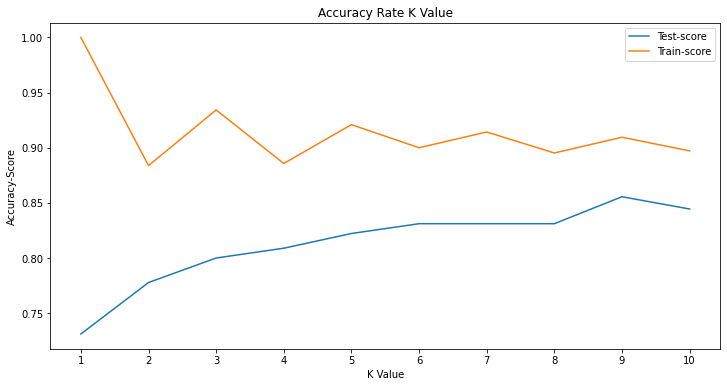

In [119]:
plt.figure(figsize=(12, 6))
plt.plot(range(1,11), testAcc, label="Test-score")
plt.plot(range(1,11), trainAcc, label="Train-score")
plt.title('Accuracy Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy-Score')
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.legend()